# **Loan Classification Case**

### The flow of the case study is as below:

- Reading the data in python
- Defining the problem statement
- Identifying the Target variable
- Looking at the distribution of Target variable
- Basic Data exploration
- Rejecting useless columns
- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
- Feature Selection based on data distribution
- Outlier treatment
- Missing Values treatment
- Visual correlation analysis
- Statistical correlation analysis (Feature Selection)
- Converting data to numeric for ML
- Sampling and K-fold cross validation
- Trying multiple classification algorithms
- Selecting the best Model
- Deploying the best model in production

In [24]:
import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [25]:
import pandas as pd
import numpy as np

LoanData=pd.read_csv('../Datasets/LoanApprovalData.csv', encoding='latin')

print('Shape of loan dataset', LoanData.shape)

# Removing the duplicate rows if any
LoanData=LoanData.drop_duplicates()

print('Shape After removing duplicates', LoanData.shape)

Shape of loan dataset (614, 13)
Shape After removing duplicates (614, 13)


In [26]:
LoanData.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
LoanData['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

### **Defining the problem statement:**
To create predictive model to tell weather a loan would be approved or not?

- Target Variable: Loan_Status
- Predictors: Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, etc.
- Loan_Status:
    - 'Y': Loan approved
    - 'N': Loan not approved

### **Determining the type of Machine Learning:**
Creating a supervised ML classification model, as the target variable is categorical.

### **Looking at the distribution of Target Variable:**
- If target variable too skewed, then the predictive modelling may not be possible.
- Bell curve is desirable but slightly positive skew or negative skew is also fine
- When performing Classification, make sure there is a balance in the distribution of each class else ML algos ability to learn is impacted.

<Axes: xlabel='Loan_Status'>

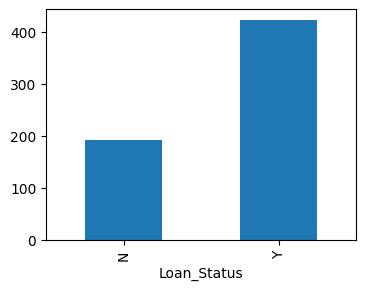

In [28]:
%matplotlib inline
# Creating Bar Chart as the Target variable is Categorical
GroupedData=LoanData.groupby('Loan_Status').size()
GroupedData.plot(kind='bar', figsize=(4,3))

### **Basic Data Exploration**
- Step to:
    - Gauge the overall data
    - Volume of the data
    - Types of columns in the data

- Initial assessment of the data being done to identify which columns are Quantitative, Categorical or Qualitative.

- Checking how each column would affect the values of the Target Variable.
    - If the column affects the final answer then remove the column.

In [29]:
LoanData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


'Loan_ID' is one such columns which seems useless as it does not affect the approval or rejection of a loan.

- Observing the summarized information of the data
- Data types, Missing values based on the number of null values Vs total rows, etc.
- Remove those variables from data which have too many missing values (Missing Values > 30%)
- Remove Qualitative variables which cannot be used in Machine Learning

In [30]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
# Looking at the descriptive statistics of the data
LoanData.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


- Finding unique values for each column
- To understand which column is **Categorical** and which column is **Continuous**
- If number of unique values,
    - < 20 -> Category
    - else continuous

In [32]:
LoanData.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### **Basic Data Exploration Results**

- **Loan_ID**: Qualitative. Rejected. This column does not affect the loan approval or rejection.
- **Gender**: Categorical. Selected. Missing value treatment required.
- **Married**: Categorical. Selected. Missing value treatment required.
- **Dependents**: Categorical. Selected. Missing value treatment required.
- **Education**: Categorical. Selected.
- **Self_Employed**: Categorical. Selected.
- **ApplicantIncome**: Quantitative. Selected. Missing value treatment required.
- **CoapplicantIncome**: Quantitative. Selected.
- **LoanAmount**: Quantitative. Selected. Missing value treatment required.
- **Loan_Amount_Term**: Categorical. Selected. Missing value treatment required.
- **Credit_History**: Categorical. Selected. Missing value treatment required.
- **Property_Area**: Categorical. Selected.
- **Loan_Status**: Categorical. Selected. This is the Target Variable!

### **Removing useless columns from the data**

Deleting those columns which are not useful in predictive analysis because these variables are qualitative

In [33]:
UselessColumns=['Loan_ID']
LoanData=LoanData.drop(UselessColumns, axis=1)
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### **Visual Exploratory Data Analysis**
- Categorical variables: Bar plot
- Continuous variables: Histogram

### **Visualize distribution of all the Categorical Predictor variables in the data using bar plots**:

- Categorical variable in the data can be spotted by looking at the unique values in them.
- A categorical variable contains less than 20 unique values and there is repetition of values, thus data can be grouped by those unique values.

**Categorical Predictors**: 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'

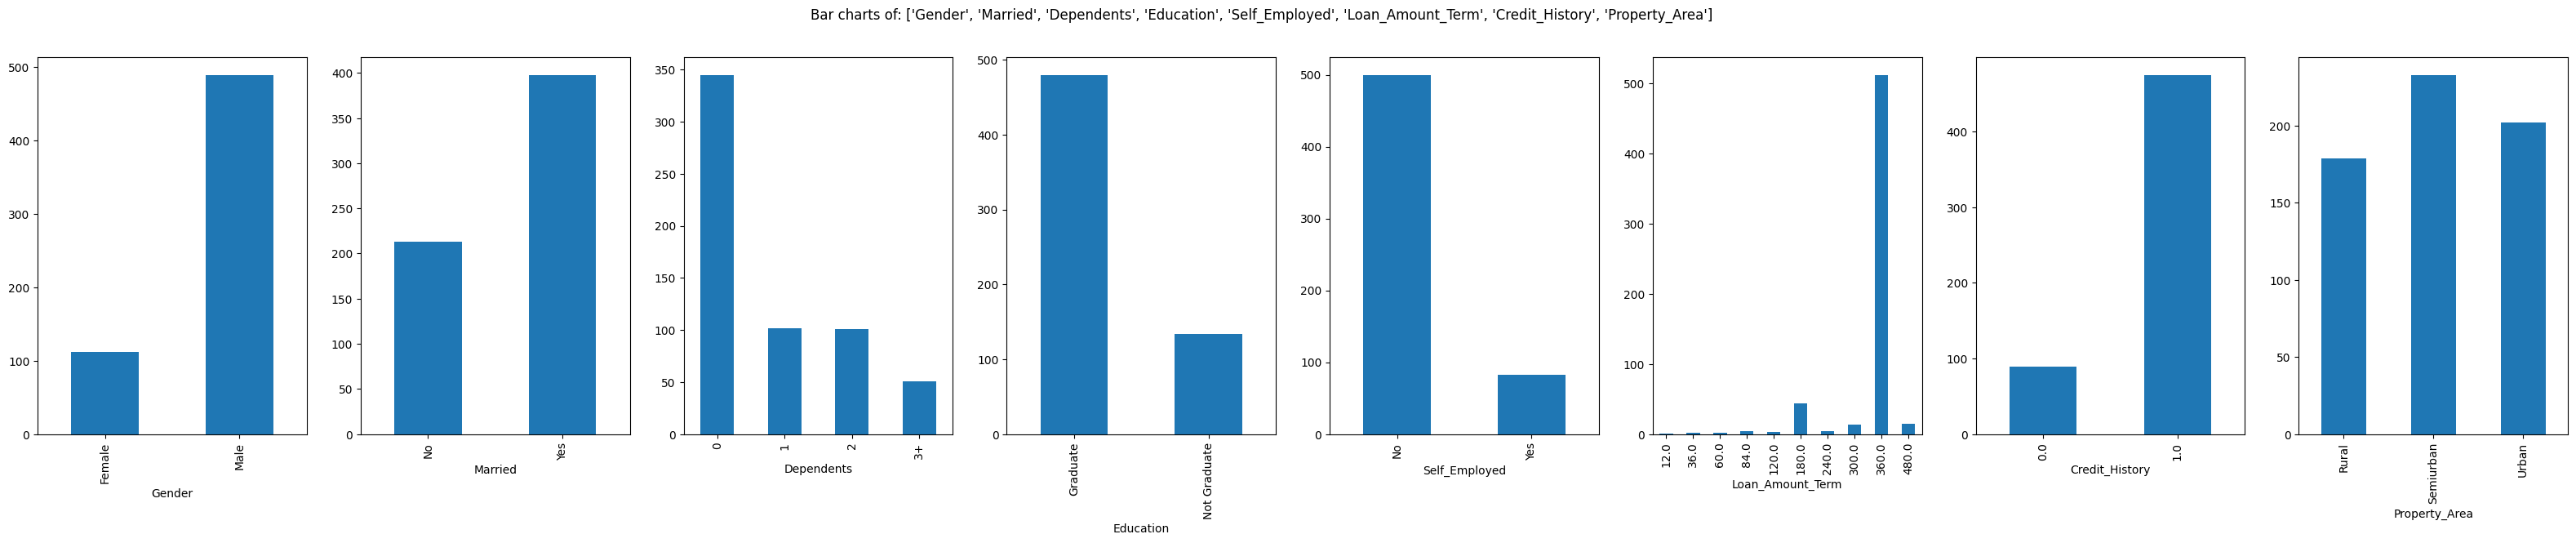

In [34]:
# Function to plot multiple bar charts at once for categorical variables

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function
PlotBarCharts(inpData=LoanData, colsToPlot=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'])

### **Bar Charts Interpretation**

- The bar charts represent the frequencies of each category in the Y-axis and the category name in the X-axis.
- In ideal bar chart, each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithms to learn from.
- If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present with very low frequency, it may indicate that the data is not suitable for the ML model to learn.
    - Correlation analysis section can be used here and a final call can be taken to select or reject the column.
- 'Loan_Amount_Term' column in data is skewed, where there is only one dominant bar and the other categories are present in very low numbers..
    - Such columns may not be correlated with the target variable but logically it can be a factor in explaining demand on a particular day.

### **Selected Categorical Variables**: 
('Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area')


### **Visualize distribution of all the Continuous Predictor variables in the data using histograms**
There are three predictor variables:

('ApplicantIncome', 'CoapplicantIncome',and 'LoanAmount')

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>, <Axes: >]], dtype=object)

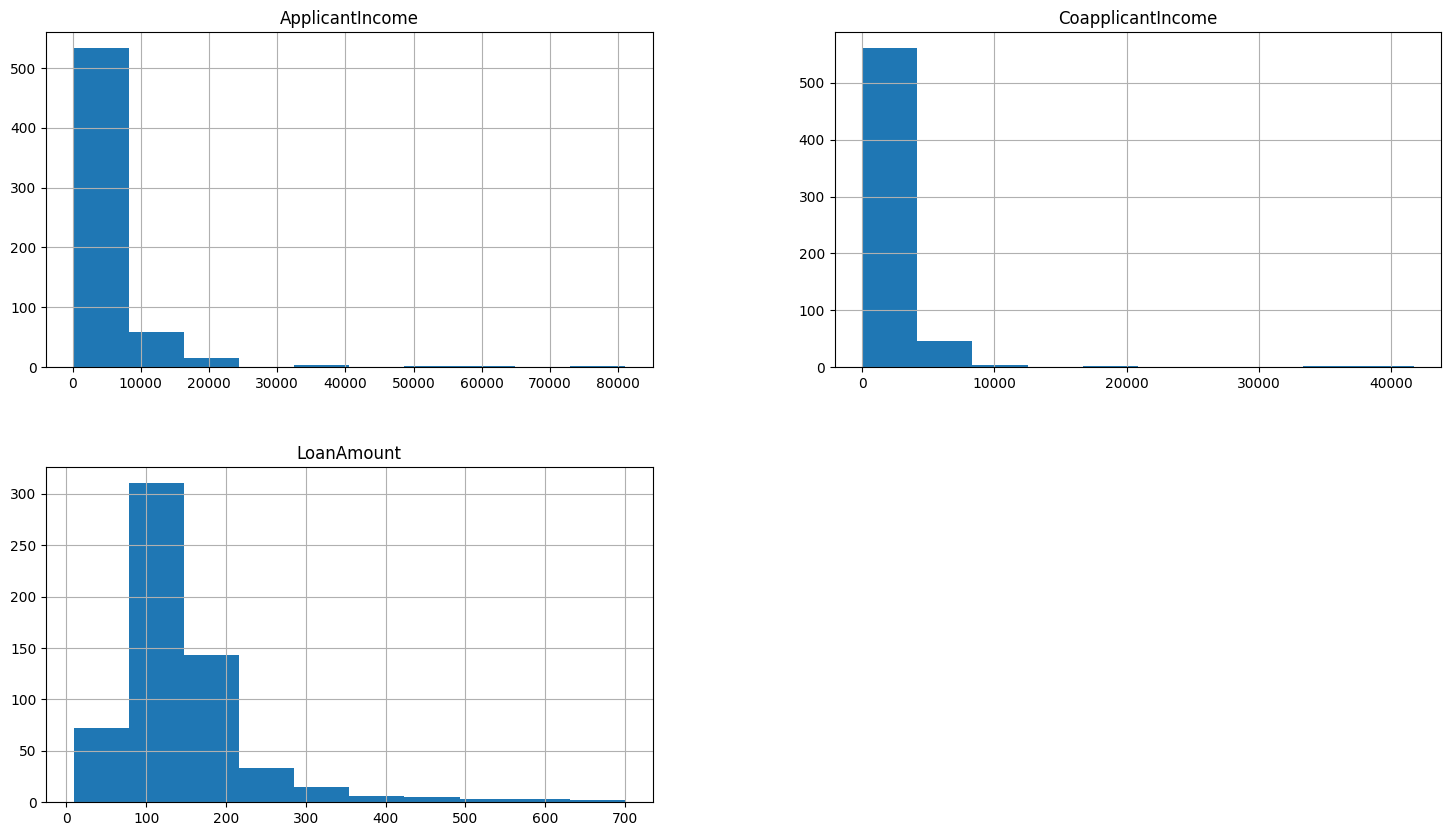

In [36]:
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], figsize=(18,10))

### **Histogram Interpretation**:

- Histogram shows the distribution for a single continuous variable.
- The X-axis shows the range of values and Y-axis represent the number of values in that range.
- In the above histogram of "LoanAmount", there are around 320 rows in the data that has a Loan Amount between 90 to 150.
- The ideal outcome for histogram is a bell curve or slightly skewed curve.
- If there is too much skewness, then outlier treatment should be donea dn that column should be re-examined, or simply reject the column if it is not useful.

### **Selected Continuous Variables**: 
- **ApplicantIncome** : Selected. Outliers seen beyond 30000, need to treat them.
- **CoapplicantIncome**: Selected. Outliers seen beyond 15000, need to treat them.
- **LoanAmount**: Selected. Slightly skewed distribution, acceptable.

### **Outlier Treatment**

- Outliers are extreme values in the data which are significantly different from the rest of the data points and can be seen as the tails in the histogram.

- Outlier must be treated one column at a time, as the treatments is slightly different for each column.

#### **Why to remove the outliers**

- Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

- Options to treat outlier in the data:
    - 1. Delete the outlier record, only if there are just few rows lost.
    - 2. Impute the outlier values with a logical business value.

Replacing outliers for 'ApplicantIncome'

In [37]:
# Finding nearest values to 30000 mark
LoanData['ApplicantIncome'][LoanData['ApplicantIncome'] > 20000].sort_values()

130    20166
308    20233
284    20667
506    20833
126    23803
183    33846
443    37719
185    39147
155    39999
171    51763
333    63337
409    81000
Name: ApplicantIncome, dtype: int64

The nearest logical value is 23803, hence, replacing any value above 30000 with it.

In [38]:
# Replacing outliers with nearest possibe value
LoanData['ApplicantIncome'][LoanData['ApplicantIncome'] > 30000] = 23803

Replacing outliers for 'CoapplicantIncome'

In [39]:
# Finding nearest values to 15000 mark
LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>10000].sort_values()

9      10968.0
177    11300.0
402    20000.0
417    20000.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64

The nearest logical value is 11300, hence, replacing any value above 15000 with it.

In [40]:
# Replacing outliers with nearest possibe value
LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>15000] = 11300

### **Visualizing distribution after outlier treatment**
- The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>]], dtype=object)

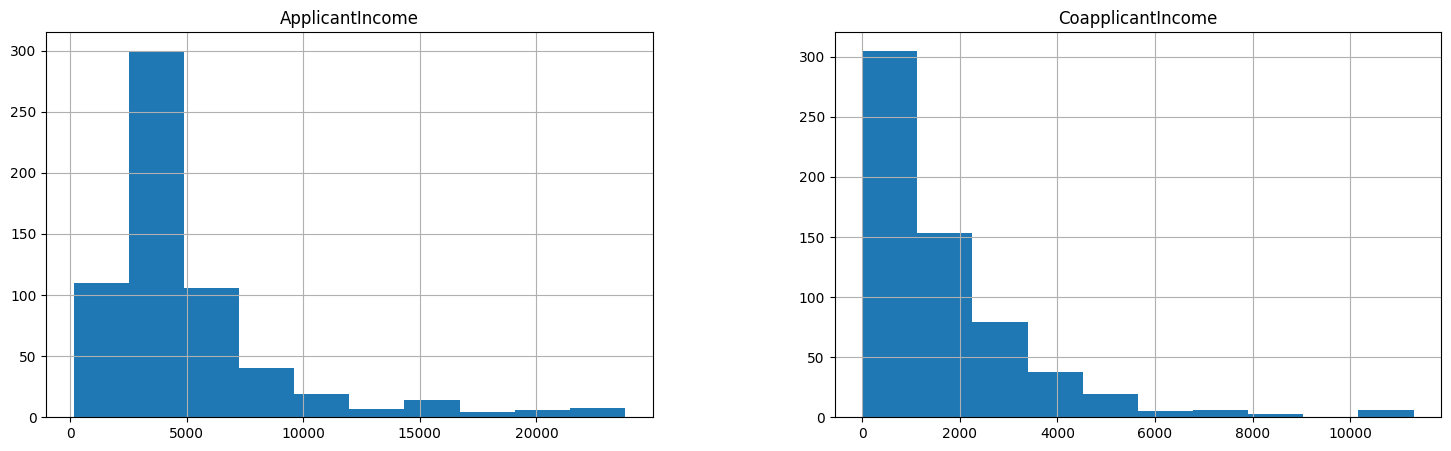

In [41]:
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome'], figsize=(18,5))

#### **Missing values treatment**
- Missing values are treated for each column separately.

- If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.


There are below options for treating missing values in data.

- Delete the missing value rows if there are only few records
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables
- Interpolate the values based on nearby values
- Interpolate the values based on business logic